In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
# You can use pandas_datareader.data as web to load data from Yahoo Finance
import yfinance as yf
data = yf.download("AAPL", start='2019-09-10', end='2020-10-09')

[*********************100%%**********************]  1 of 1 completed


In [8]:
# Preprocess the data
# We'll use only 'Close' prices for this example
data = data.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .8 ))


In [9]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [10]:
# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])


In [11]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data into 3-D shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
160/160 [==============================] - 5s 15ms/step - loss: 0.0052
Epoch 2/20
160/160 [==============================] - 2s 15ms/step - loss: 0.0020
Epoch 3/20
160/160 [==============================] - 2s 15ms/step - loss: 0.0016
Epoch 4/20
160/160 [==============================] - 2s 15ms/step - loss: 0.0015
Epoch 5/20
160/160 [==============================] - 2s 15ms/step - loss: 0.0017
Epoch 6/20
160/160 [==============================] - 2s 15ms/step - loss: 0.0019
Epoch 7/20
160/160 [==============================] - 2s 15ms/step - loss: 0.0014
Epoch 8/20
160/160 [==============================] - 2s 15ms/step - loss: 0.0011
Epoch 9/20
160/160 [==============================] - 2s 15ms/step - loss: 0.0012
Epoch 10/20
160/160 [==============================] - 2s 16ms/step - loss: 0.0011
Epoch 11/20
160/160 [==============================] - 2s 15ms/step - loss: 0.0012
Epoch 12/20
160/160 [==============================] - 2s 15ms/step - loss: 0.0010
Epoch 13/20
1

In [17]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [18]:
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

2/2 [==============================] - 1s 16ms/step


C:\Users\chand\AppData\Local\Temp\ipykernel_18292\3445250526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


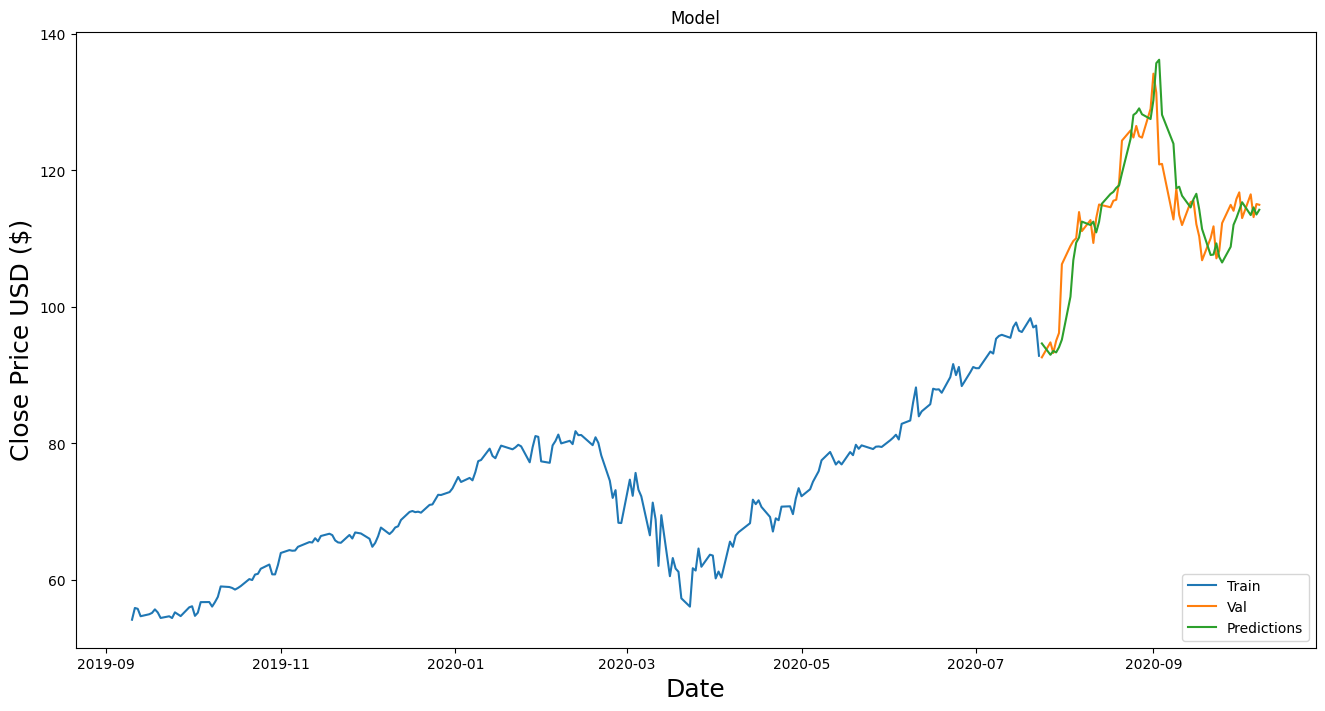

In [19]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()